<a href="https://colab.research.google.com/github/felipecardosobcc/Atividade01---Matem-tica-Computacional/blob/main/Atividade01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Atividade 0 - Uso do Jupyter, Git, Matplotlib e Transformações Lineares**

## Descrição da Tarefa:

Implemente, utilizando uma ferramenta do tipo Jupyter (ex.: Jupyter Notebook, JupyterLab, Google Colab), um notebook que demonstre:



1.   Rotação horária de 90° e shear (cisalhamento) em x, diferentes dos exemplos apresentados em sala.
2.   A obtenção das matrizes de transformação a partir dos vetores unitários (bases) — mostrando o processo numericamente e graficamente com o Matplotlib.
3. A aplicação passo a passo dessas matrizes a dois vetores arbitrários, com apresentação de resultados numéricos e gráficos no Matplotlib.

Requisitos obrigatórios:



*   Uso de ferramenta Jupyter-like (Jupyter Notebook, Colab, etc.).
*   Versionamento e entrega via Git (enviar o link do repositório).






In [26]:
# pip install matplotlib
# pip install numpy

In [ ]:
# Importação das bibliotecas
import matplotlib.pyplot as plt
import numpy as np

# Vetor
vetor = np.array([6, 8])

# Plot
plt.figure() # Iniciando o gráfico
plt.quiver(0, 0, vetor[0], vetor[1], angles='xy', scale_units='xy', scale=1, color='b') # Desenhando o vetor
plt.xlim(0, 10) # Definindo os limites do eixo X
plt.ylim(0, 10) # Definindo os limites do eixo Y
plt.grid(True) # Ativando as grades do gráfico
ax = plt.gca()  # pega os eixos atuais
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)
plt.text(3.9, 0.1, 'x', fontsize=12, fontweight='bold')
plt.text(0.1, 3.9, 'y', fontsize=12, fontweight='bold')
plt.gca().set_aspect('equal', adjustable='box')
plt.show() # Plotando o gráfico

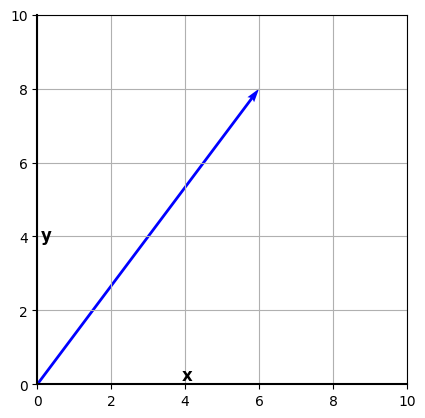

## **Descobrindo o Quadrante do Vetor**

Definindo uma função quadrante( ) que recebe um vetor e retorna o quadrante em que o vetor pertence.



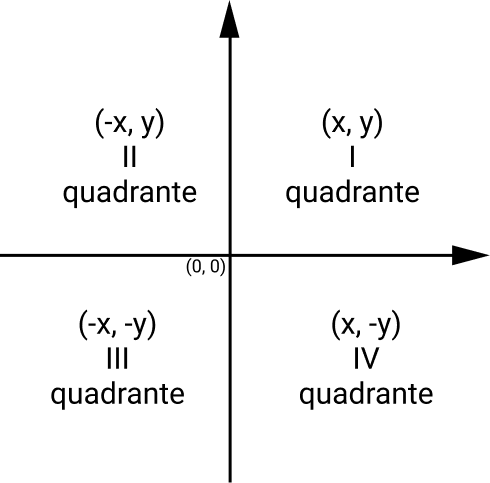

In [88]:
def quadrante(vector):
  if vector[0] > 0 and vector[1] > 0:
    return '1'
  elif vector[0] < 0 and vector[1] > 0:
    return '2'
  elif vector[0] < 0 and vector[1] < 0:
    return '3'
  elif vector[0] > 0 and vector[1] < 0:
    return '4'
  elif vector[0] == 0 or vector[1] == 0:
    return '0' # Componentes em cima dos eixos

## **Generalizando a rotação**

Com base no quadrante do vetor, a função altera o sinal do componente específico para a sua rotação em 90 graus no sentido horário.

In [115]:
def rotacao90(vetor, quadrante):
  R = vetor # Vetor rotacionado
  match quadrante:
    case '1':
      R[1] = vetor[1] * (-1)
    case '2':
      R[0] = vetor[0] * (-1)
    case '3':
      R[1] = vetor[1] * (-1)
    case '4':
      R[0] = vetor[0] * (-1)
    case '0':
      if vetor[0] < 0 and vetor[1] == 0:
        R[1] = vetor[0] * (-1)
        R[0] = 0
      elif vetor[1] < 0 and vetor[0] == 0:
        R[0] = vetor[1]
        R[1] = 0
      elif vetor[0] > 0 and vetor[1] == 0:
        R[1] = vetor[0] * (-1)
        R[0] = 0
      elif vetor[1] > 0 and vetor[0] == 0:
        R[0] = vetor[1]
        R[1] = 0
      else:
        R = vetor
  return R

In [ ]:
#vetor = np.array([6, 8])

vetor_quadrante = quadrante(vetor)
R = rotacao90(vetor, vetor_quadrante)

plt.figure()
plt.quiver(0, 0, R[0], R[1], angles='xy', scale_units='xy', scale=1, color='b')
plt.xlim(-6, 6)
plt.ylim(-8, 8)
plt.grid(True)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)

plt.text(3.9, 0.1, 'x', fontsize=12, fontweight='bold')
plt.text(0.1, 3.9, 'y', fontsize=12, fontweight='bold')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

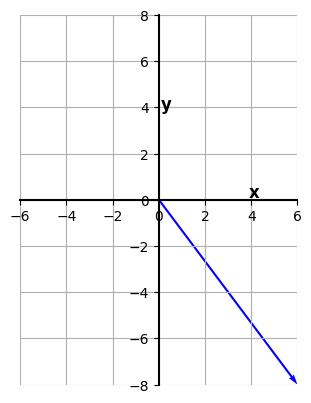

## **Cisalhamento em X (Shear)**

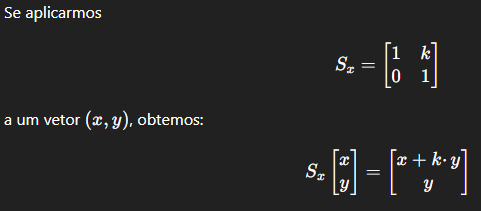

In [73]:
def cisalhamentoX(vetor, k):
  cis = vetor
  cis[0] = vetor[0] + k*vetor[1]
  return cis

In [ ]:
vetor = np.array([6, 8])

vetor_quadrante = quadrante(vetor)
R = rotacao90(vetor, vetor_quadrante)

# Cisalhamento em X do vetor R (rotacionado) para k=1
cisalhamento = cisalhamentoX(R, 1)

plt.figure()
plt.quiver(0, 0, cisalhamento[0], cisalhamento[1], angles='xy', scale_units='xy', scale=1, color='b')
plt.xlim(-6, 6)
plt.ylim(-8, 8)
plt.grid(True)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)

plt.text(3.9, 0.1, 'x', fontsize=12, fontweight='bold')
plt.text(0.1, 3.9, 'y', fontsize=12, fontweight='bold')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

## **Rotação 90 graus sentido horário e Cisalhamento em X**

Aqui temos o resultado de um vetor [6, 8] rotacionado em 90 graus sentido horário e em seguida realizado o cisalhamento em X.

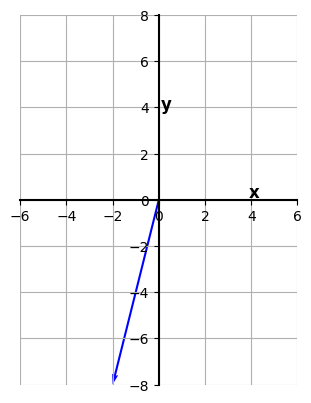

## **Matriz de Transformação**

Para obter a matriz de transformação, usaremos os seguintes vetores unitários:

In [ ]:
# Definindo vetores unitários
v1 = np.array([0, 1])
v2 = np.array([1, 0])

plt.quiver(0, 0, v1[0], v1[1], scale=1, scale_units='xy', angles='xy', color='b')
plt.quiver(0, 0, v2[0], v2[1], scale=1, scale_units='xy', angles='xy', color='b')
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.axhline(0,color='black',linewidth=1)
plt.axvline(0,color='black',linewidth=1)
plt.text(-0.2, 0.5, 'j', fontweight='bold')
plt.text(0.2, -0.3, 'i', fontweight='bold')
plt.gca().set_aspect('equal', adjustable='box')
plt.grid(True)
plt.show()

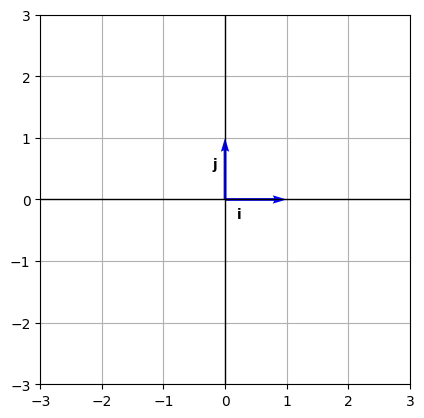

## **Matriz Resultante**

Rotação e Cisalhamento em X operados na Matriz Resultante dos vetores unitários

In [ ]:
Matriz = [[0, 1], [1, 0]]

Mv1_quadrante = quadrante(Matriz[0])
Mv2_quadrante = quadrante(Matriz[1])

Mv1R = rotacao90(Matriz[0], Mv1_quadrante)
Mv2R = rotacao90(Matriz[1], Mv2_quadrante)

plt.quiver(0, 0, Mv1R[0], Mv1R[1], scale=1, scale_units='xy', angles='xy', color='b')
plt.quiver(0, 0, Mv2R[0], Mv2R[1], scale=1, scale_units='xy', angles='xy', color='b')
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.axhline(0,color='black',linewidth=1)
plt.axvline(0,color='black',linewidth=1)
plt.text(-0.2, -0.7, 'i', fontweight='bold')
plt.text(0.2, -0.3, 'j', fontweight='bold')
plt.gca().set_aspect('equal', adjustable='box')
plt.grid(True)
plt.show()

Rotação da Matriz.

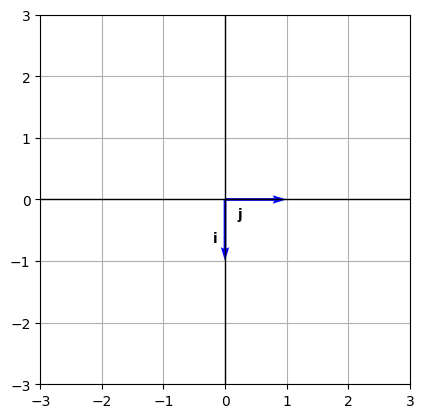

In [ ]:
cis_Mv1R = cisalhamentoX(Mv1R, 1)
cis_Mv2R = cisalhamentoX(Mv2R, 1)

plt.quiver(0, 0, cis_Mv1R[0], cis_Mv1R[1], scale=1, scale_units='xy', angles='xy', color='b')
plt.quiver(0, 0, cis_Mv2R[0], cis_Mv2R[1], scale=1, scale_units='xy', angles='xy', color='b')
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.axhline(0,color='black',linewidth=1)
plt.axvline(0,color='black',linewidth=1)
plt.text(-0.2, -0.7, 'i', fontweight='bold')
plt.text(0.2, -0.3, 'j', fontweight='bold')
plt.gca().set_aspect('equal', adjustable='box')
plt.grid(True)
plt.show()

Cisalhamento em X da Matriz rotacionada para k=1

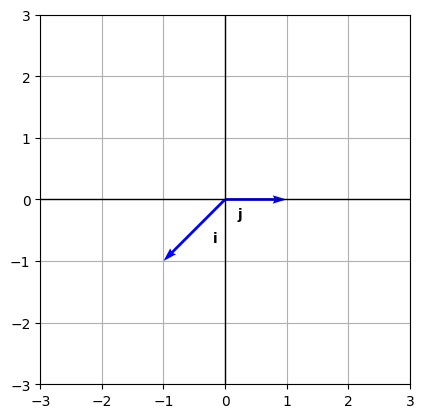

**Vetores Transformados:**

i = [-1, 1]
j = [1, 0]

**Matriz Transformação:**

A Matriz Transformação obtida pela concatenação dos dois vetores se dá por:

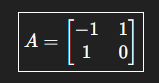

## **Aplicação dessas matrizes a dois vetores arbitrários**

In [ ]:
aa = np.array([7, -3])
ab = np.array([-5, 9])

plt.quiver(0, 0, aa[0], aa[1], scale=1, scale_units='xy', angles='xy', color='r')
plt.quiver(0, 0, ab[0], ab[1], scale=1, scale_units='xy', angles='xy', color='b')
plt.xlim(-9, 9)
plt.ylim(-9, 9)
plt.axhline(0,color='black',linewidth=1)
plt.axvline(0,color='black',linewidth=1)
plt.text(-2.2, 4, 'aa', fontweight='bold')
plt.text(0.2, -1, 'bb', fontweight='bold')
plt.gca().set_aspect('equal', adjustable='box')
plt.grid(True)
plt.show()

Vetores arbitrários escolhidos:

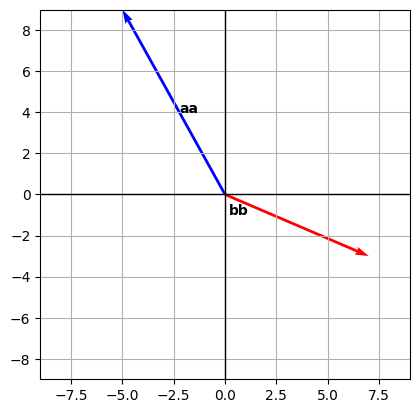

Aplicando a Matriz Transformação em vetores arbitrários, temos:

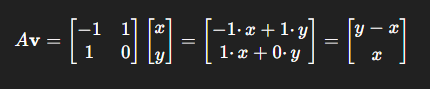

Logo, temos a seguinte operação sobre os vetores arbitrários escolhidos anteriormente:

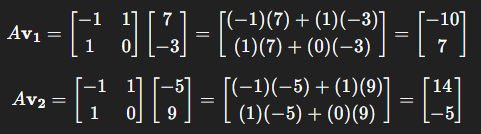

In [ ]:
aaT = np.array([-10, 7])
abT = np.array([14, -5])

plt.quiver(0, 0, aaT[0], aaT[1], scale=1, scale_units='xy', angles='xy', color='r')
plt.quiver(0, 0, abT[0], abT[1], scale=1, scale_units='xy', angles='xy', color='b')
plt.xlim(-14, 14)
plt.ylim(-14, 14)
plt.axhline(0,color='black',linewidth=1)
plt.axvline(0,color='black',linewidth=1)
plt.text(-2.2, 2, 'aaT', fontweight='bold')
plt.text(0.2, -2, 'bbT', fontweight='bold')
plt.gca().set_aspect('equal', adjustable='box')
plt.grid(True)
plt.show()

Agora, temos os vetores transformados pela Matriz de Transformação:

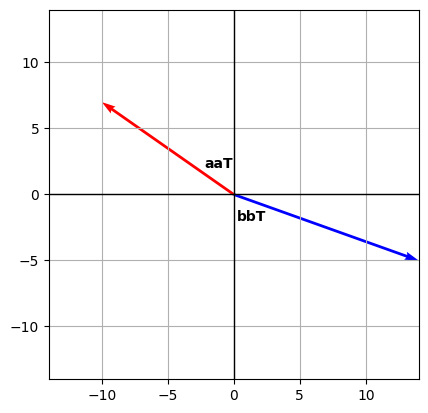